Reading Data

In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

SEQ_LEN = 50
INPUT_SIZE = 4 * 25  # 25 landmarks X 4 features each - x,y,z,vis


def read_raw_data(score_path, data_path):
    shot_names = {}

    score_df = pd.read_csv(score_path)
    score_df = score_df[score_df['frames'] < SEQ_LEN]

    data_df = pd.read_csv(data_path)
    amount_of_shots = len(score_df)
    print('all examples:', amount_of_shots)

    single_shot_x = np.zeros((SEQ_LEN, INPUT_SIZE))
    x = np.zeros((amount_of_shots, SEQ_LEN, INPUT_SIZE))
    y = []
    shot_index = 0

    for _, row in tqdm(score_df.iterrows()):

        frames = row['frames']
        score = row['score']
        shot_name = row['name']

        for i in range(0, frames):
            frame_name = shot_name + '_{}'.format(i)
            shot_data = []
            for k, v in data_df[data_df['name'] == frame_name].iteritems():
                if k == 'name':
                    continue
                shot_data.append(v.values[0])
            single_shot_x[i] = np.array(shot_data)

        if shot_index == amount_of_shots:
            break

        y.append(score)
        x[shot_index] = np.nan_to_num(single_shot_x)
        shot_names[shot_index] = shot_name
        shot_index += 1

    return x, np.array(y), shot_names


# keep x and y unchanged
x, y, names = read_raw_data(score_path='labels/fts_score.csv', data_path='labels/fts_data.csv')

all examples: 1371


0it [00:00, ?it/s]

visualization option

C:\Users\Adi brucker\PycharmProjects\pythonProject\DL_PROJECT\TT_train\visualization\custom_drawing_utils.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 10))


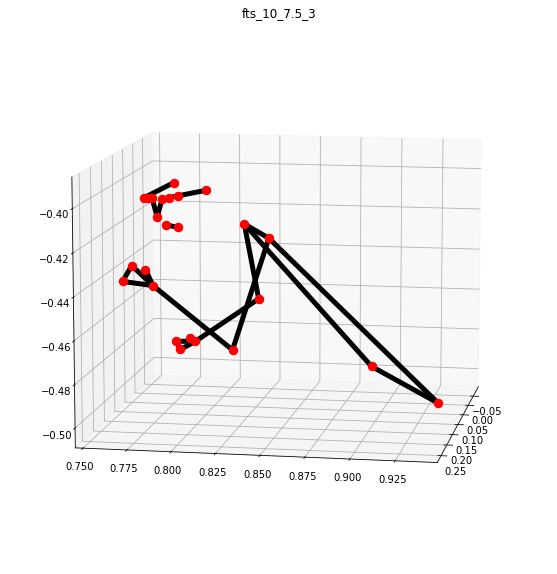

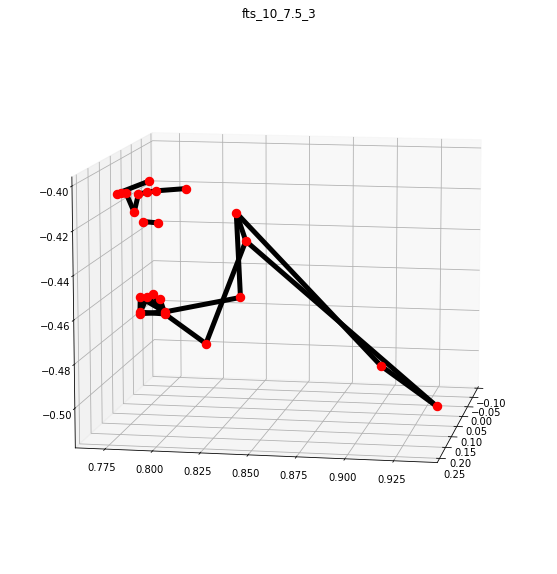

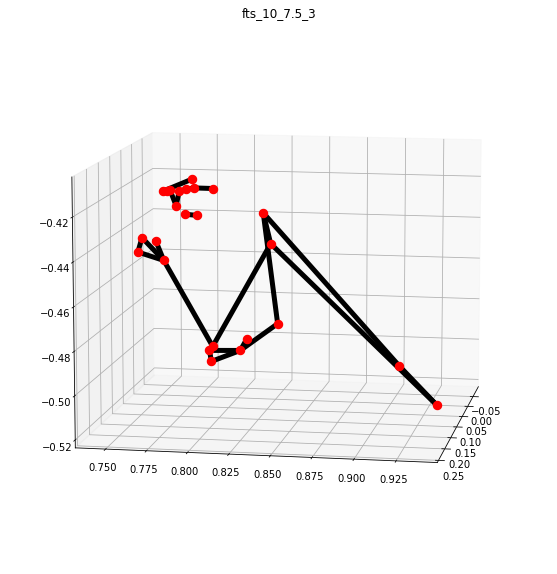

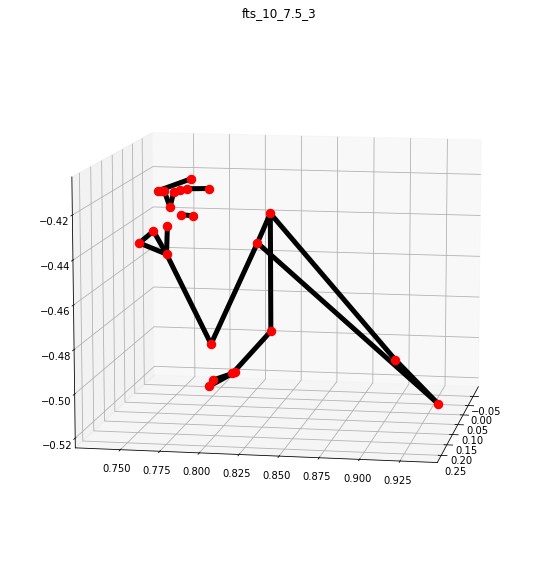

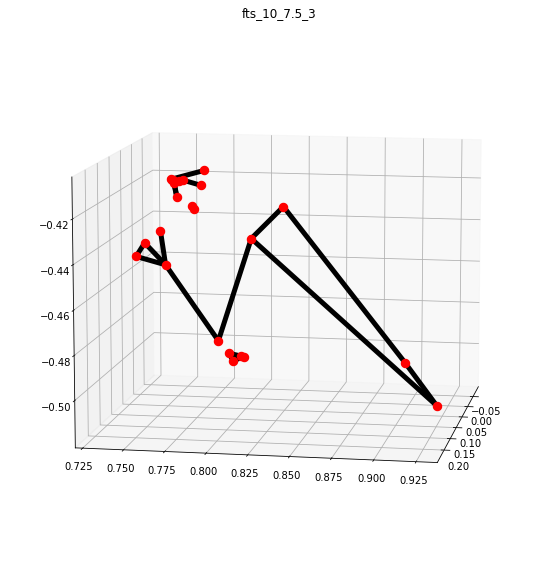

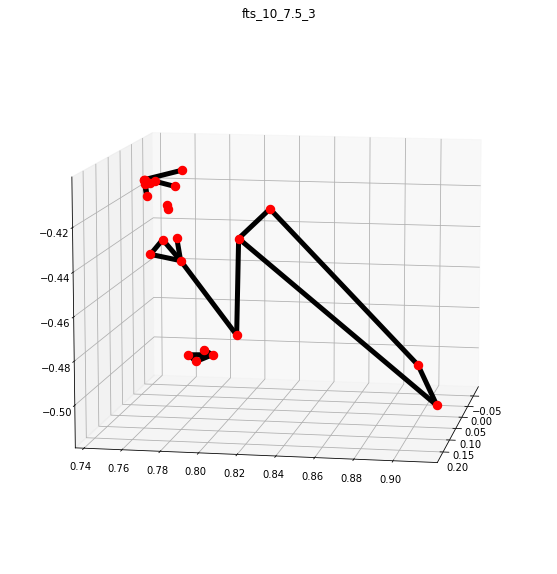

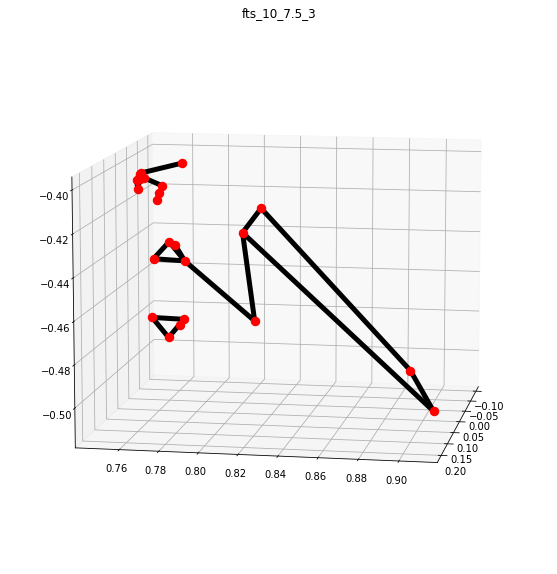

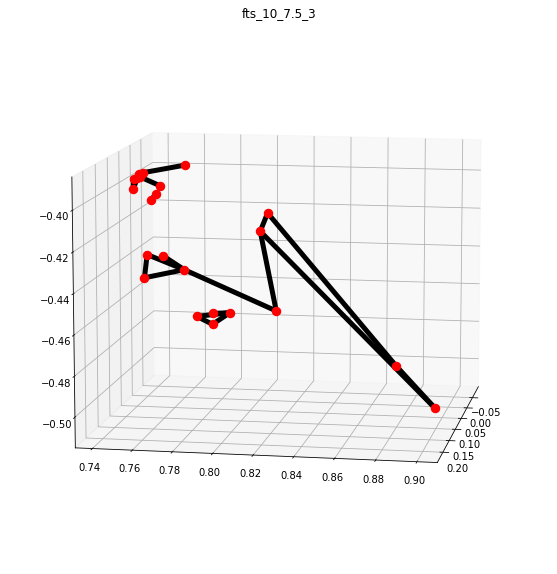

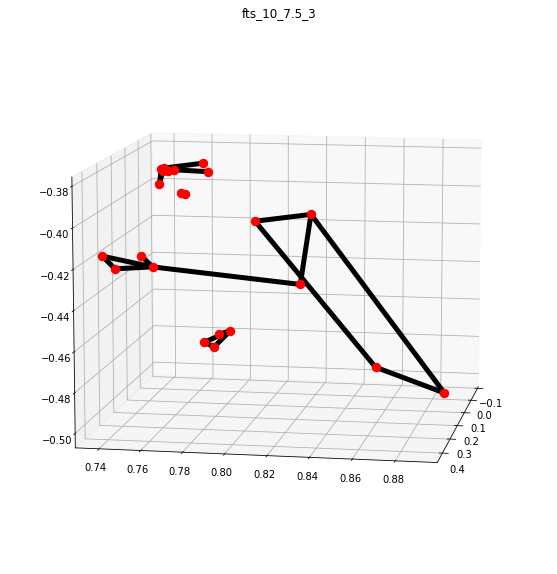

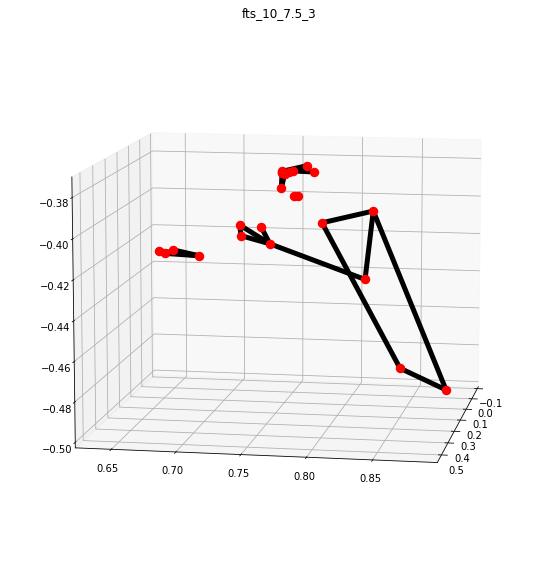

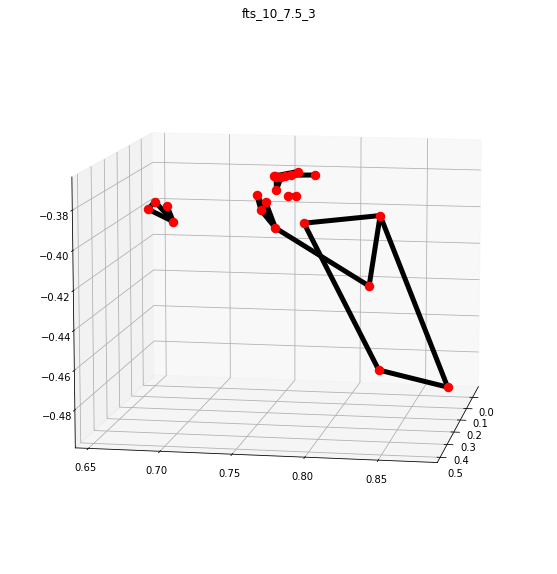

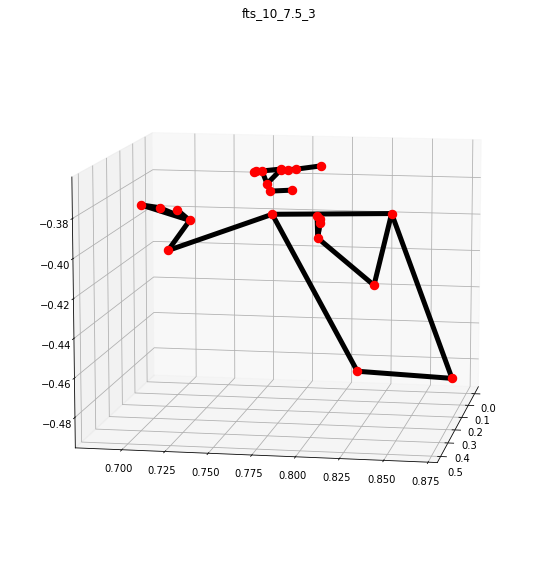

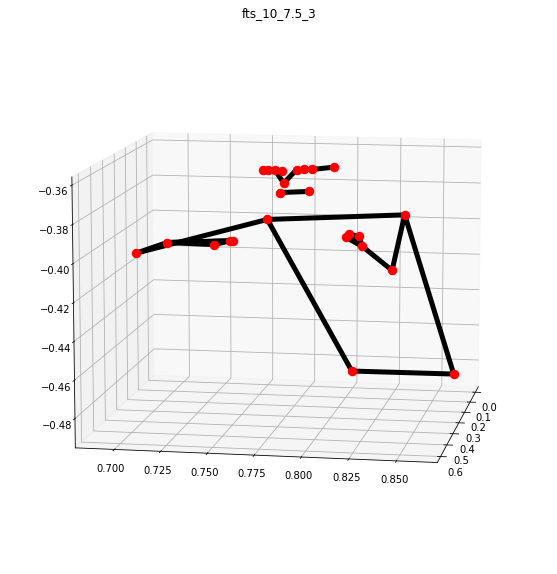

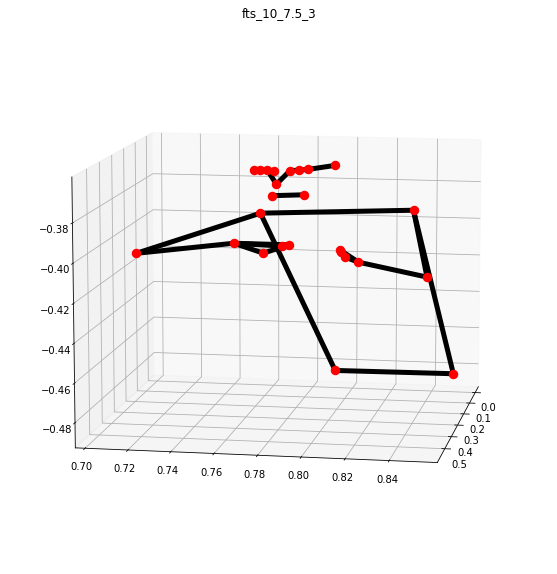

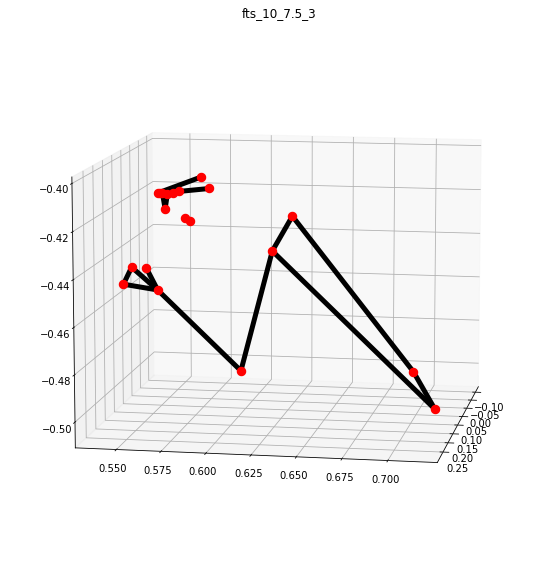

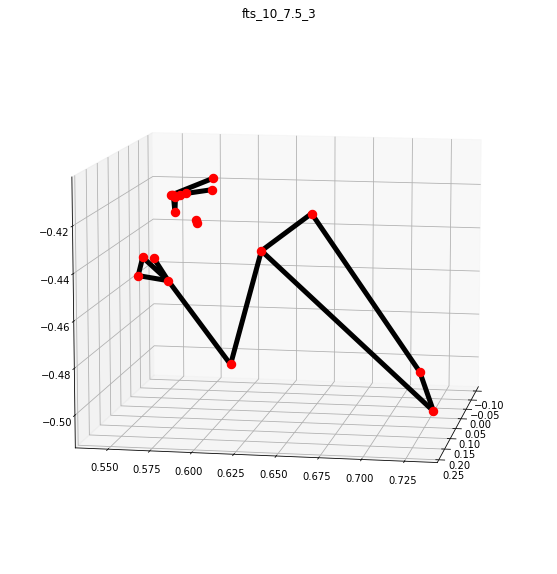

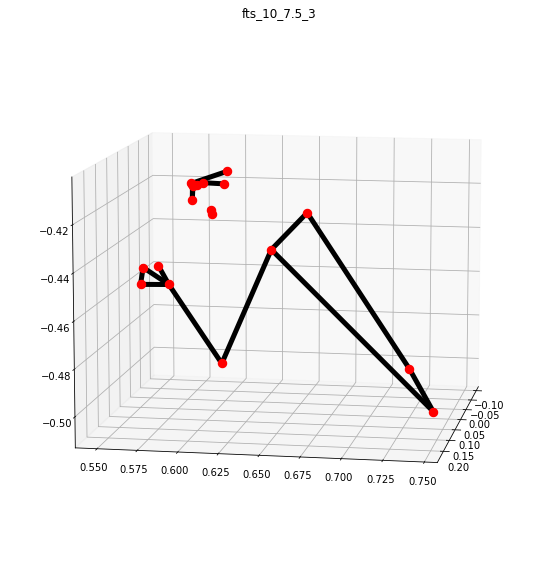

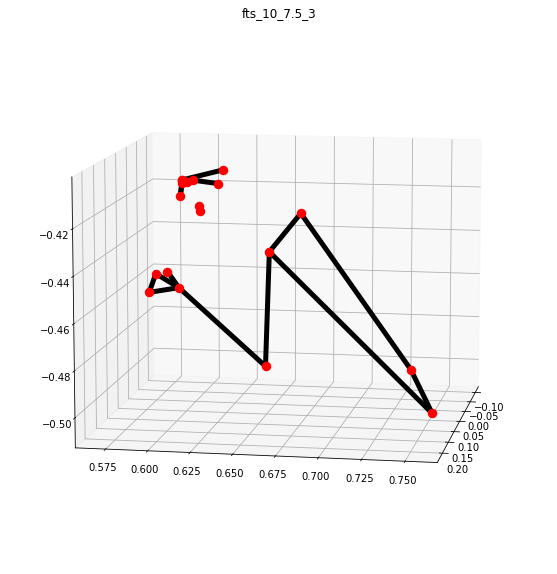

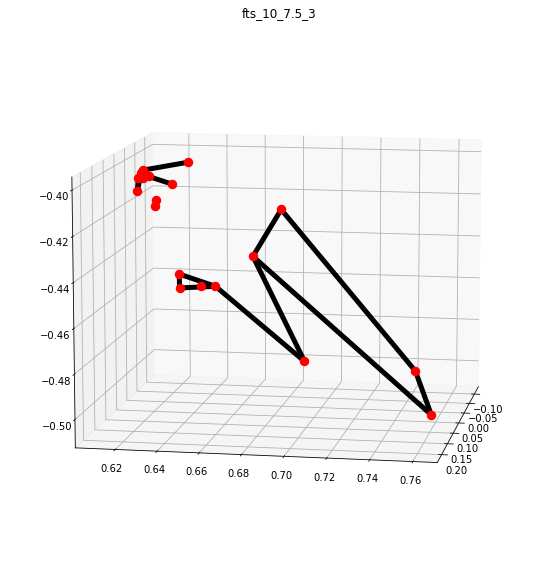

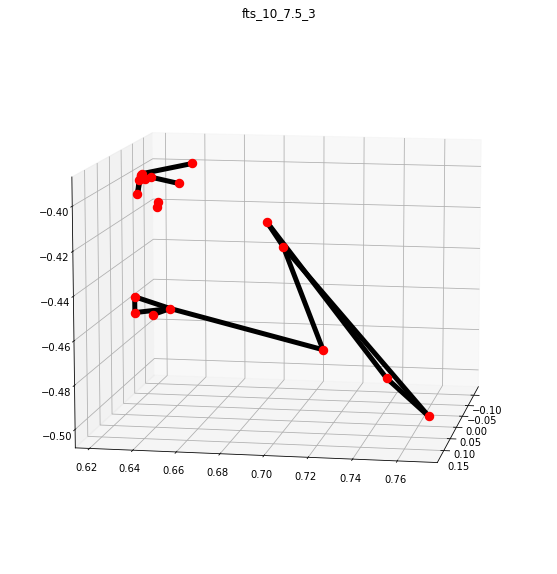

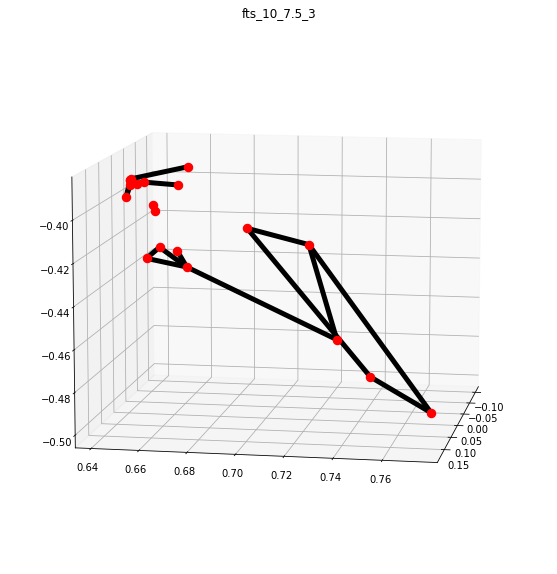

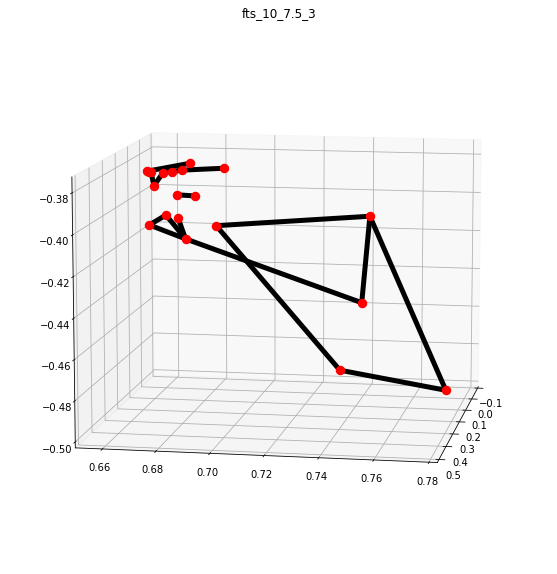

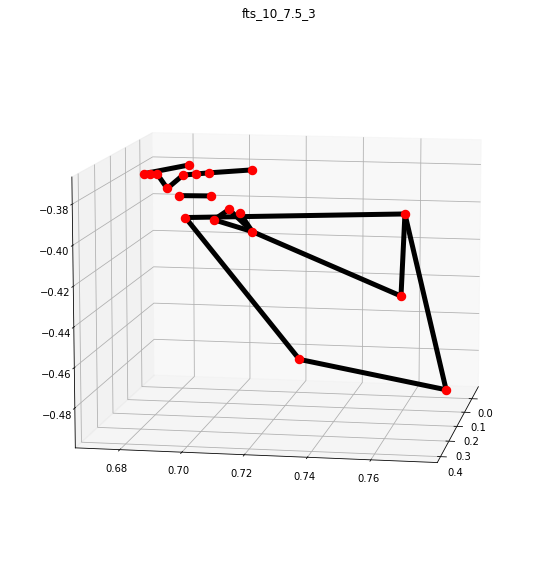

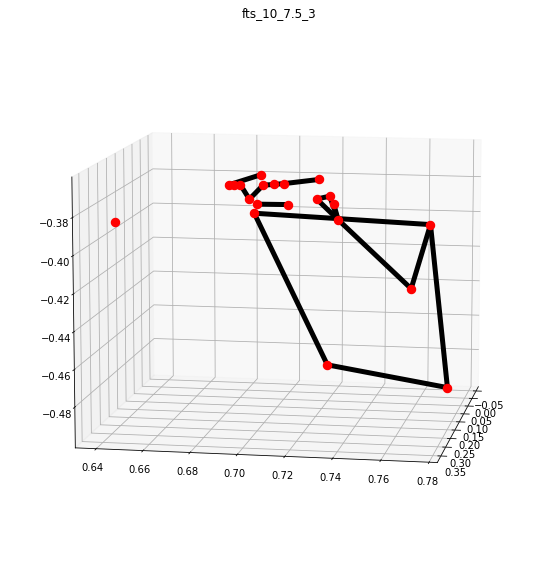

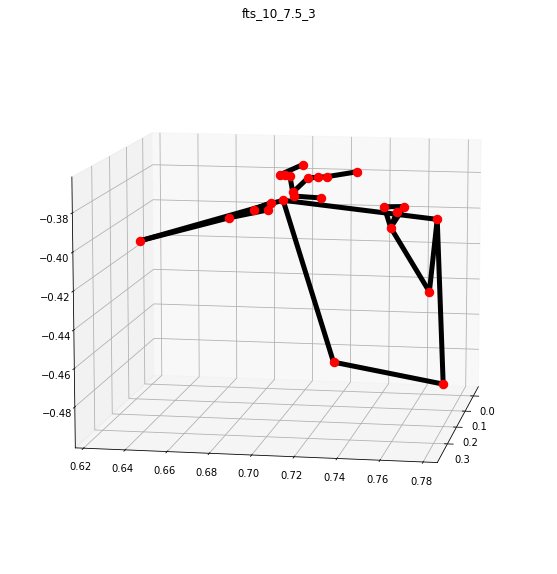

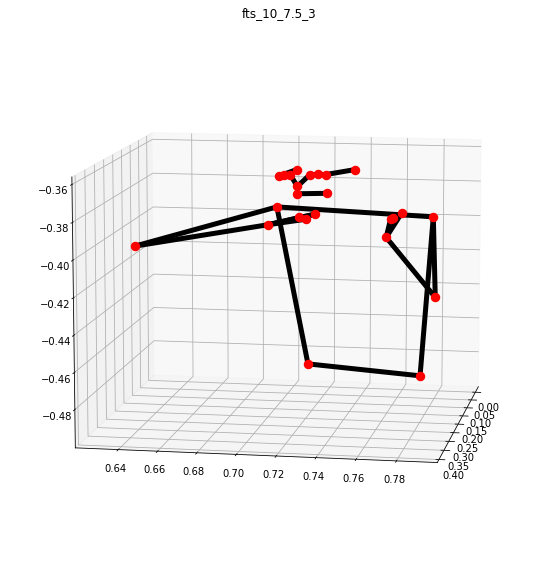

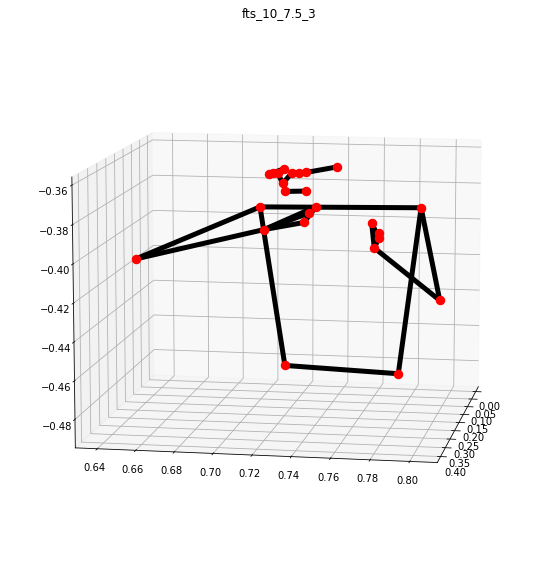

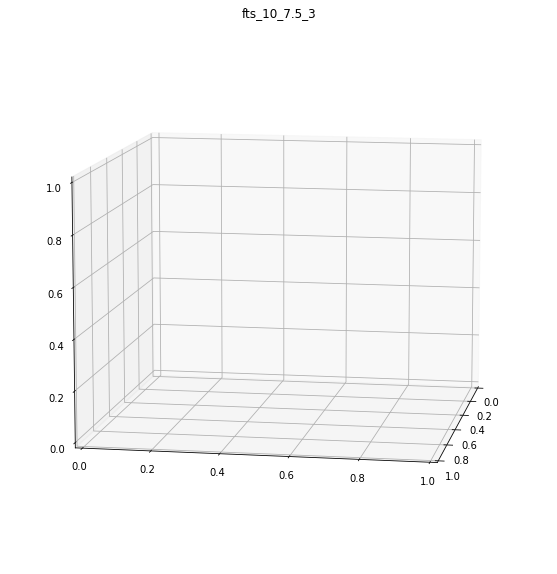

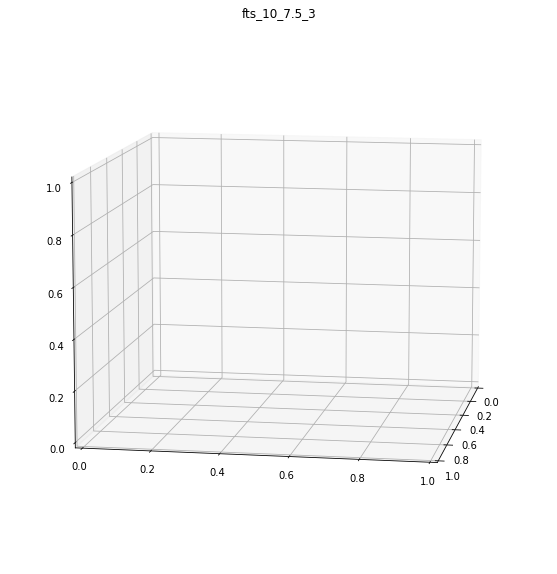

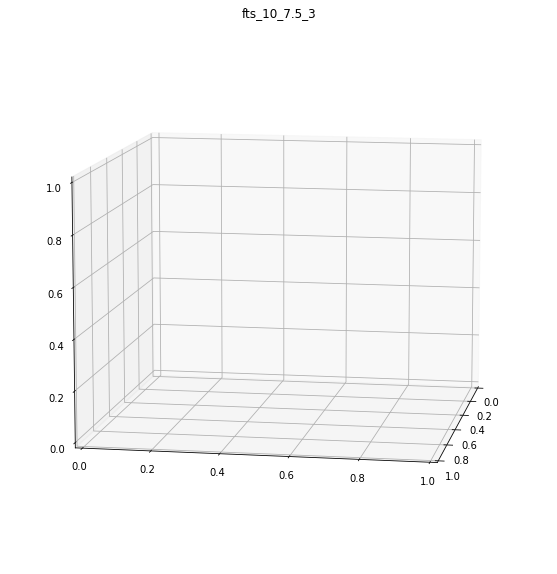

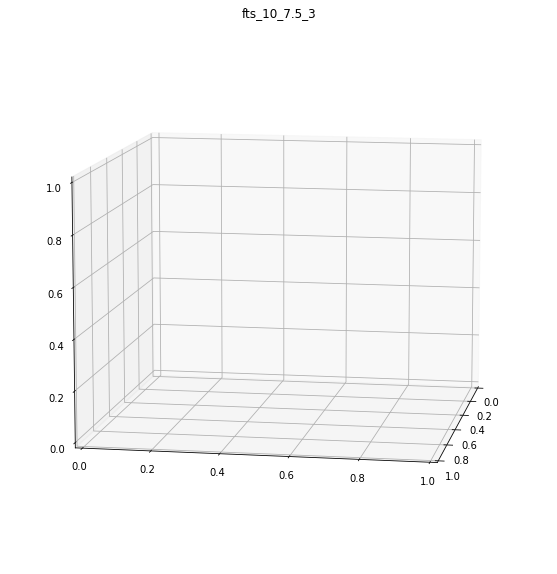

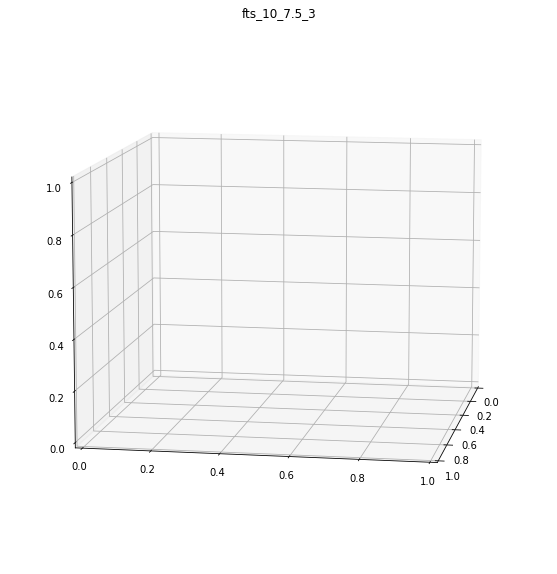

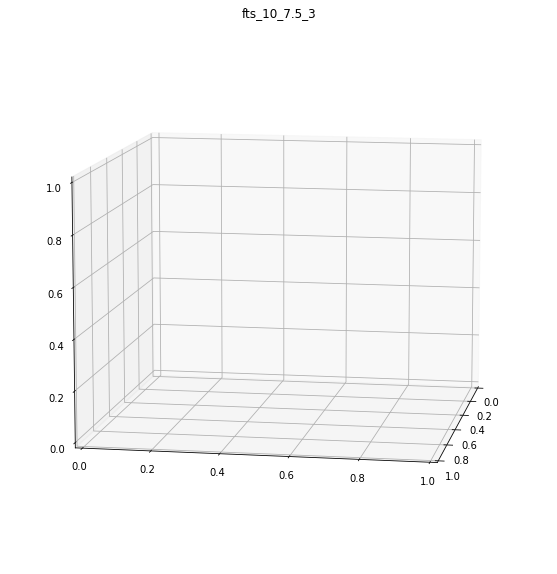

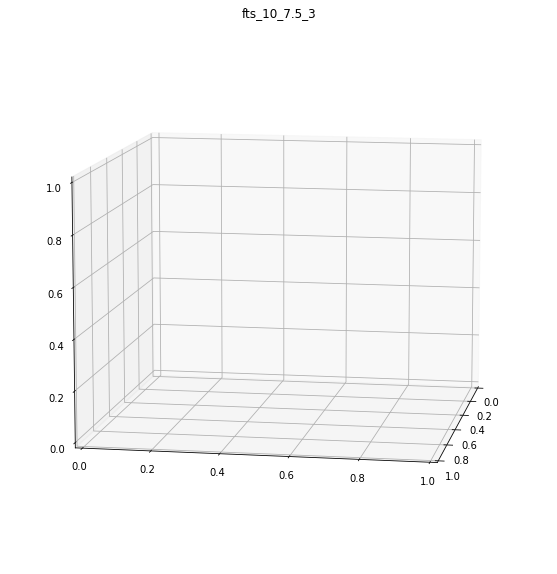

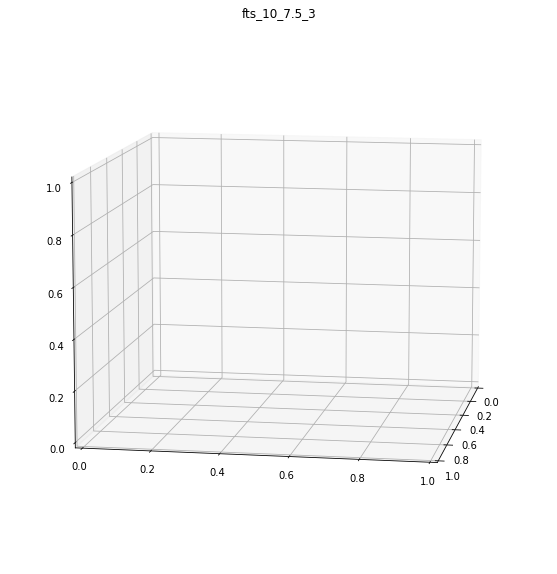

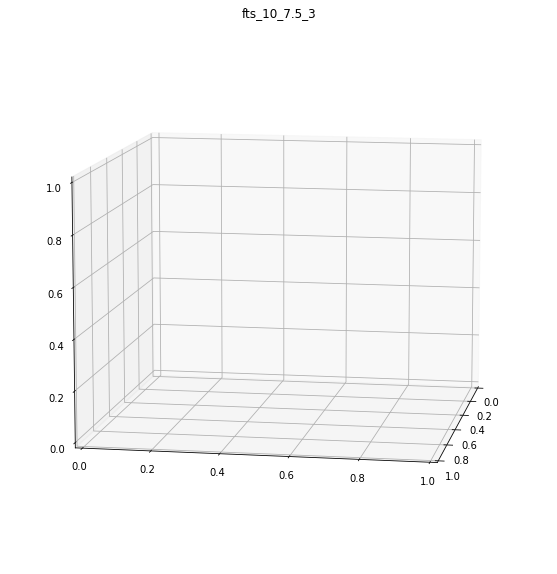

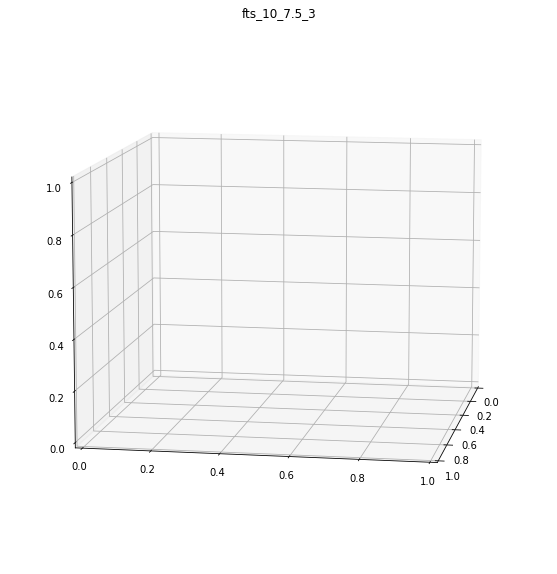

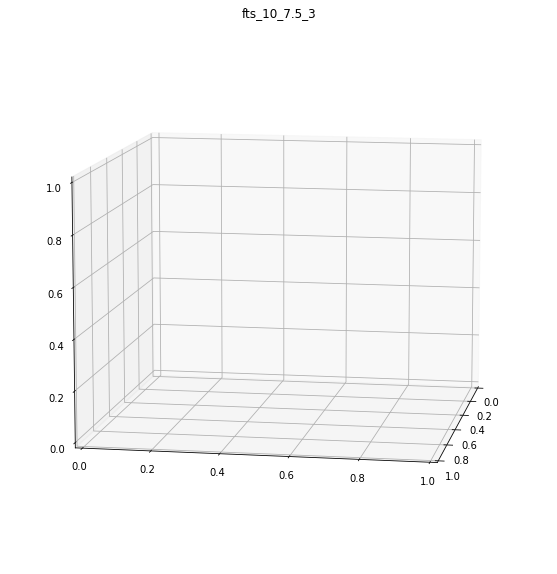

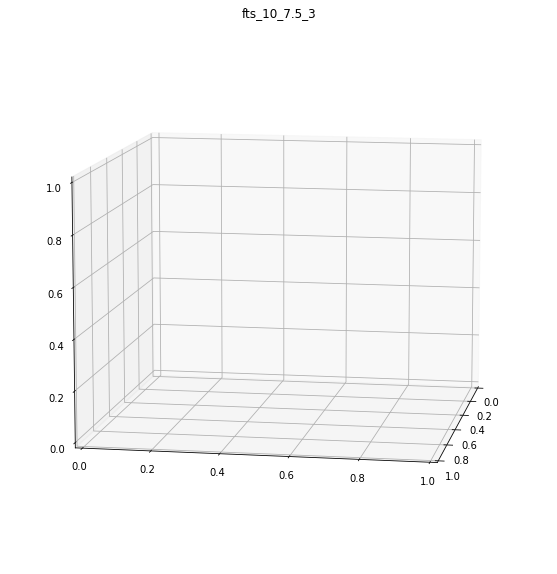

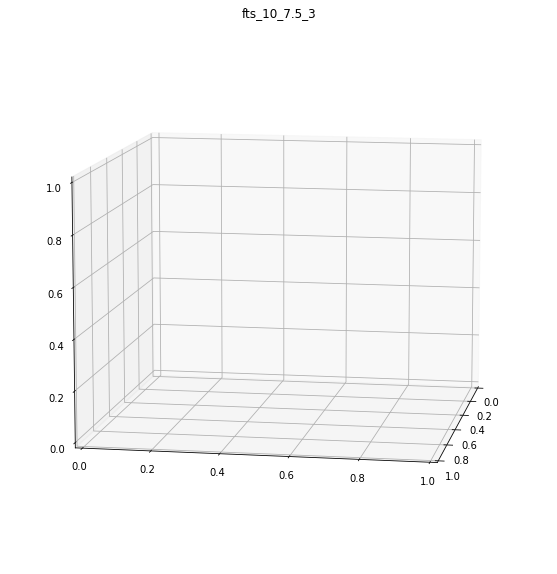

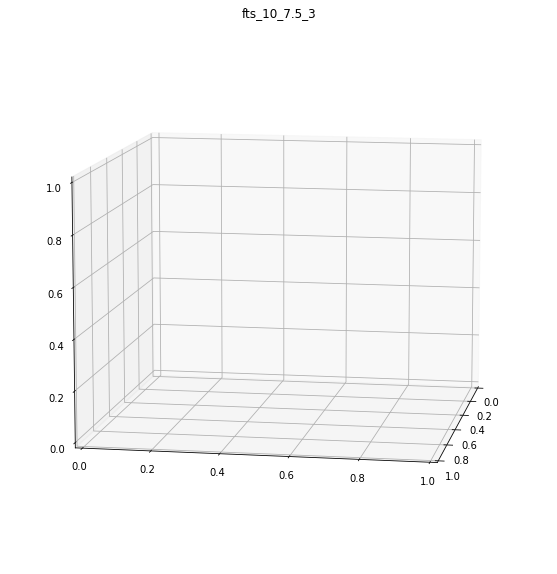

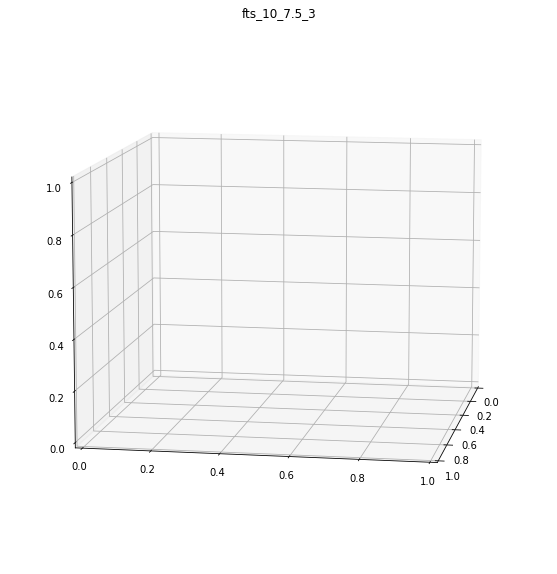

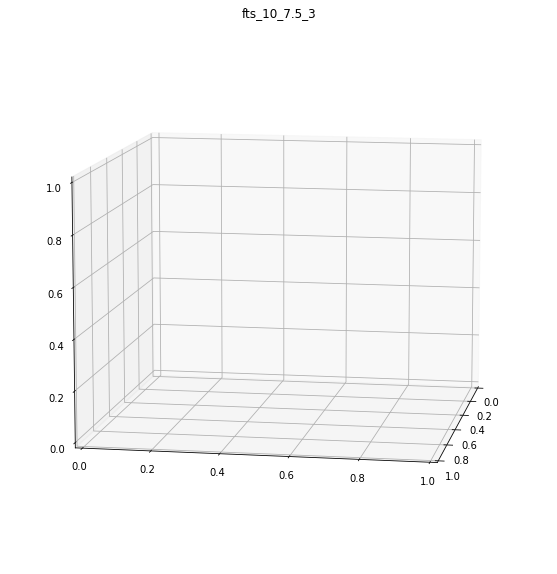

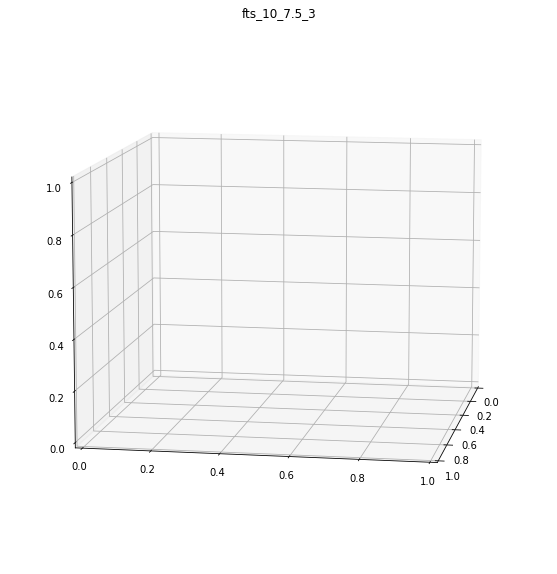

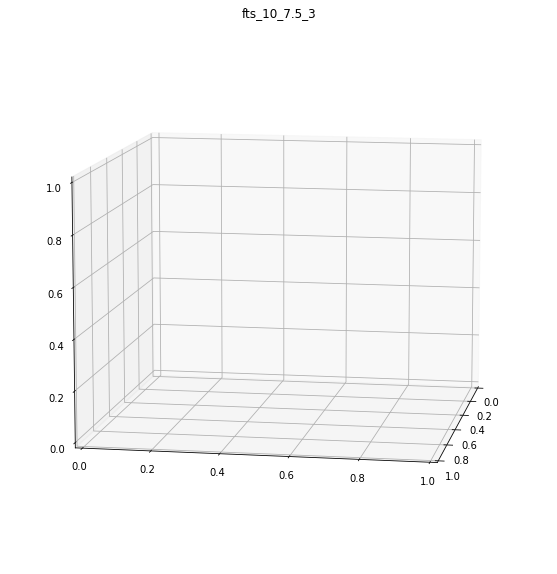

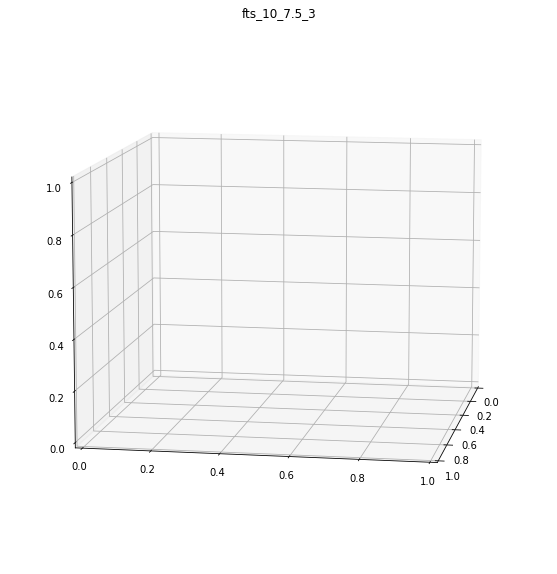

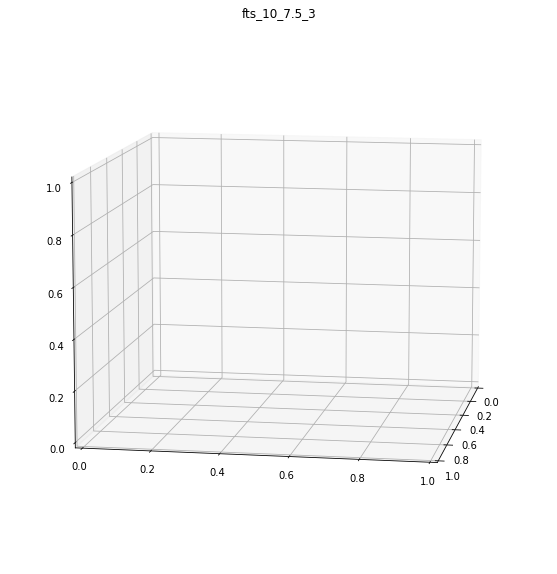

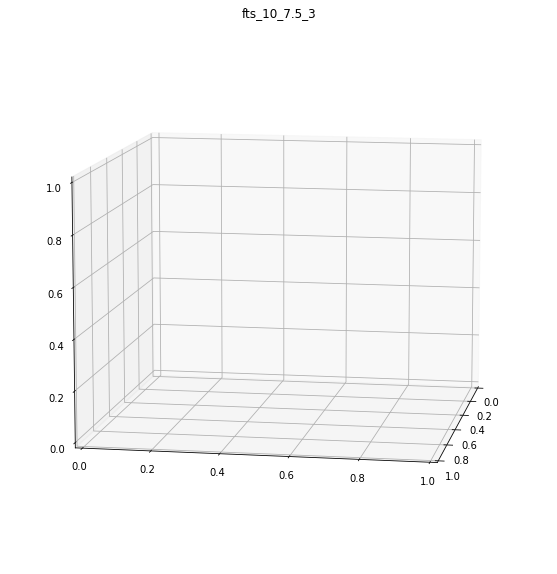

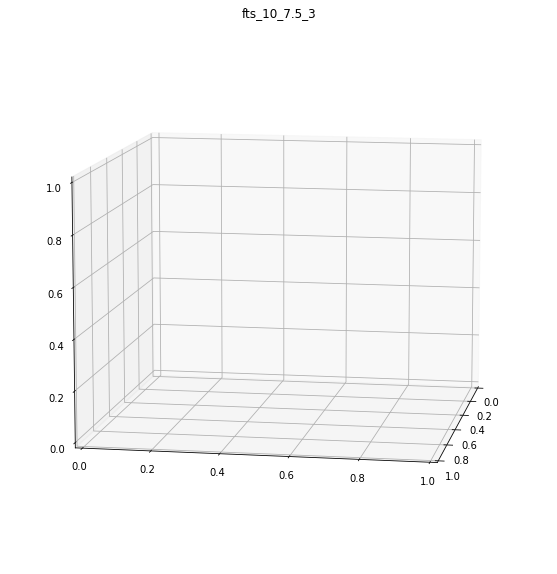

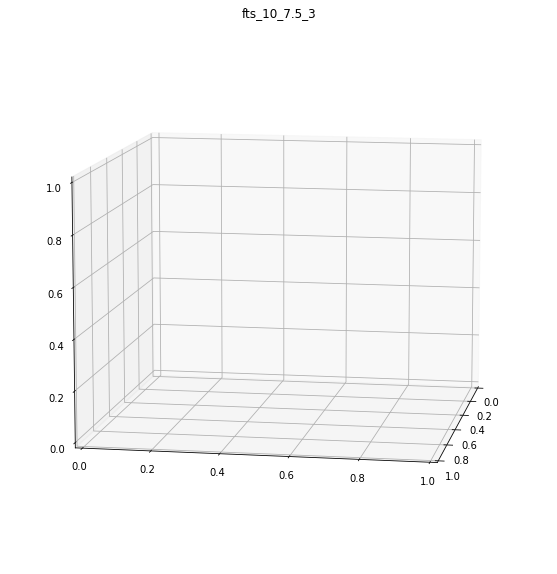

In [2]:
from visualization import points_visualization

points_visualization.create_gif_for_given_shot(names[3], x[3])

Feature Selection

In [ ]:
def feature_selection(remove_features):
    copy = x.copy() # don't change x
    # TODO - impl
    return copy

#Usage example - remove head landmarks 
head_landmarks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
data = feature_selection(head_landmarks)
print(data.shape)

Binary scoring

In [ ]:
score_threshold = 6
labels = np.array(y)
labels[labels <= score_threshold] = 0
labels[labels > score_threshold] = 1
unique, counts = np.unique(labels, return_counts=True)
for idx, c in enumerate(counts):
    print(f'label: {idx}: {c} samples')